In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pickle
import sys
import os

## パーセプトロンの実装

In [2]:
# ANDゲートの実装
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [4]:
# ニューラルネットワークを意識したANDゲートの実装
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [5]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [6]:
# NANDゲートの実装
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [7]:
print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(1, 1))

1
1
1
0


In [8]:
# ORゲートの実装
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.4
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [9]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [10]:
# XORゲートの実装
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [11]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


## ニューラルネットワークの実装

### 活性化関数

#### ステップ関数

In [12]:
## ステップ関数の実装
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [13]:
x = np.array([-1.0, 1.0, 2.0])
step_function(x)

array([0, 1, 1])

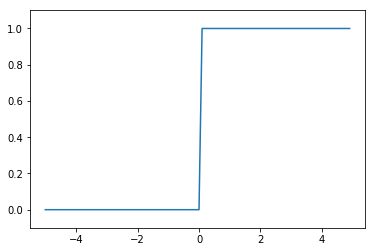

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### シグモイド関数

$$
h(x) = \frac{1}{1 + exp(-x)} \\
$$

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [17]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


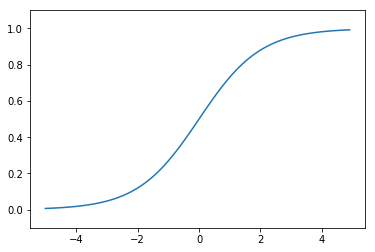

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### ReLU関数

In [19]:
def relu(x):
    return np.maximum(0, x)

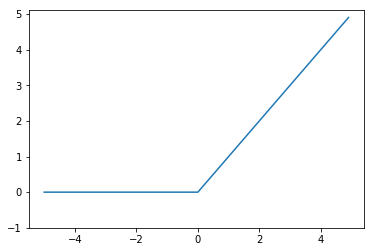

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.1)
plt.show()

## 多次元配列の計算

In [21]:
A = np.array([1, 2, 3, 4])
print(A)
print(A.shape)
print(A.shape[0])

[1 2 3 4]
(4,)
4


In [22]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(np.shape(B))

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 行列の内積

#### 2 × 2行列同士の内積

In [23]:
A = np.array([[1, 2], [3, 4]])
print(np.shape(A))
B = np.array([[5, 6], [7, 8]])
print(np.shape(B))
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


#### 2 × 3行列と3 ×2行列の内積

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


#### ニューラルネットワークの内積

In [25]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


#### ニューラルネットワークの各層における信号伝達の実装

In [26]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

# 第１層目の重み付き和
A1= np.dot(X, W1) + B1
print(A1)

# 活性化関数に渡す
Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [27]:
# 第１層から第２層までの実装
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


In [28]:
# 第２層から出力層の実装
# 活性化関数(恒等写像関数)の定義
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


#### ニューラルネットワーク実装のまとめ

In [29]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### ソフトマックス関数

In [30]:
def softmax(a):
    # オーバーフロー対策として最大値をすべての要素から減算する
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [31]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## 手書き数字認識

In [32]:
import sys, os
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [33]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [34]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [35]:
60000 / 784

76.53061224489795

In [36]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    return softmax(a3)

In [37]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [38]:
# バッチ処理対応版　
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## ニューラルネットワークの学習

### 2乗和誤差

$$
E = \frac{1}{2}\sum_{k}^{}(yk - tk)^2
$$

In [39]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) **2)

In [40]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.5, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.7225


### 交差エントロピー誤差

$$
E = -\sum_{k}^{}t_k \log{y_k}
$$

In [41]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [42]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.5, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### ミニバッチ学習に対応した交差エントロピー誤差

$$
E = -\frac{1}{N} \sum_{n}^{} \sum_{k}^{} t_{nk} \log{y_{nk}}
$$

In [43]:
def cross_entropy_error_batch(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [44]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [45]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 微分

#### 数値微分の定義

$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$

数値微分には誤差が解析的微分（真の微分）と比べるとどうしても誤差が生じてしまう。
誤差を減らす工夫として、定義通りに「(x + h)とxの差分」ではなく、「(x + h)と(x - h)の差分」を計算することで誤差を減らせる。
前者は前方差分とよばれ、後者は中心差分とよばれる。

In [46]:
# 前方差分ではなく、中心差分で微分を行う
# h は限りなく0に近い数値だが、丸め誤差が発生してしまうので「1e-4」にした
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

下記数式を数値微分で微分する
$$
y = 0.01x^2 + 0.1x
$$

In [47]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

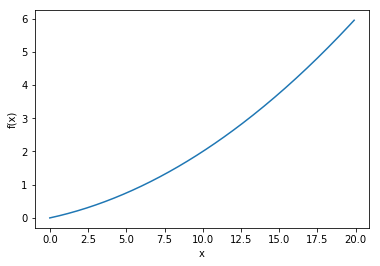

In [48]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [49]:
# x = 5で微分
print(numerical_diff(function_1, 5))
# x = 10で微分
print(numerical_diff(function_1, 10))


0.1999999999990898
0.2999999999986347


## 偏微分

偏微分の例

$f(x_0, x_1) = x_0^2+x_1^2$

In [4]:
def function_2(x):
    return np.sum(x**2)

$x_0 = 3, x_1 = 4$のときの$x_0$に対する偏微分$\frac{df}{dx_0}$を求める

In [52]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [53]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

$x_0 = 3, x_1 = 4$のときの$x_0$に対する偏微分$\frac{df}{dx_1}$を求める

In [54]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [55]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [9]:
# 勾配の実装
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        # 数値微分を行う
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

In [5]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [13]:
# 勾配降下法の実装
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

$
f(x_0, x_1) = x_0^2+x_1^2 
$
の最小値を勾配法で求める

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [15]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [16]:
# 勾配降下法の実装（学習率が大きすぎる例：lr=10.0）  大きな値へと発散してしまう
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [18]:
# 勾配降下法の実装（学習率が小さすぎる例：lr=1e-10）　　初期値からほとんど更新されずに終わる
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

## ニューラルネットワークに対する勾配

In [24]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # ガウス分布で初期化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [30]:
net = simpleNet()
print(net.W)

[[-1.00236356  0.96360257 -0.19937841]
 [ 0.57443299 -0.97757422  0.03335158]]


In [31]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p)

[-0.08442845 -0.30165526 -0.08961062]


0

In [32]:
t = np.array([1, 0, 0])
net.loss(x, t)

1.029468646603789

In [33]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.38568193  0.17247178  0.21321014]
 [-0.57852289  0.25870767  0.31981522]]


In [35]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.38568193  0.17247178  0.21321014]
 [-0.57852289  0.25870767  0.31981522]]


#### 2層ニューラルネットワークのクラス

In [40]:
import sys, os
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [41]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [42]:
x = np.random.rand(100, 784) # ダミーの入力データ
t = np.random.rand(100, 10)    # ダミーの正解ラベル

grads = net.numerical_gradient(x, t) # 勾配を計算

In [43]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1
train_size = len(x_train)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)